In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import betabinom
import os
import seaborn as sns
import networkx as nx
%matplotlib inline

In [2]:
def graph_remove_dummy_true(graph):
    nodes_dummy_true = [x for x,y in graph.nodes(data=True) if y['is_dummy']==True]
    graph.remove_nodes_from(nodes_dummy_true)
    return graph

In [24]:
# Functions to compute beta binomial

def compute_beta(alpha, n, mean):
    return (1-mean/n) / (mean/n) * alpha


def compute_alpha(n, mean, variance):
    ratio = (1-mean/n) / (mean/n)
    alpha = ((1+ratio)**2 * variance - n**2 * ratio) / (n*ratio*(1+ratio) - variance* (1 + ratio)**3)
    return alpha

In [3]:
real_graph_path =  "/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/OASIS_full_batch/modified_graphs/"
real_graph_list = os.listdir(real_graph_path)

In [4]:
# Extract real data statistics

real_node_list = []
for g in real_graph_list:
    g1 = nx.read_gpickle(real_graph_path+g)
    g1 = graph_remove_dummy_true(g1)
    real_node_list.append(len(g1.nodes))

In [5]:
nb_ref = 88
ref_nodes = list(i for i in range(nb_ref))

In [12]:
def remove_and_add_nodes():
    
    mean_real_data = 88         # mean real data
    std_real_data = 4           # std real data


    mu = 10 # mu_A = mu_B = mu
    sigma = std_real_data

    alpha = compute_alpha(n , mu, sigma**2)  # corresponding alpha with respect to given mu and sigma
    beta = compute_beta(alpha, n, mu)       # corresponding beta

    nb_supress = betabinom.rvs(n, alpha, beta, size=1)[0]
    nb_outliers = betabinom.rvs(n, alpha, beta, size=1)[0]
    
    return nb_supress, nb_outliers

In [13]:
# Generate fake simulated data 

num_graphs = 134

all_simu = []

for i in range(3):
    simu = []
    for j in range(num_graphs):
        
        nb_supress, nb_outliers = remove_and_add_nodes()
        g = ref_nodes[:len(ref_nodes) - nb_supress]
        g = g + [k for k in range(nb_outliers)]
        simu.append(len(g))
        
    all_simu.append(simu)
    
simu_1, simu_2, simu_3 = all_simu

In [26]:
np.std(simu_3),np.std(simu_2),np.std(simu_1)

(5.969911375857948, 6.066007490114646, 6.06866938058013)

In [27]:
np.mean(simu_3),np.mean(simu_2),np.mean(simu_1)

(88.90298507462687, 88.21641791044776, 87.82835820895522)

/home/rohit/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/rohit/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/rohit/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

Text(0.5, 1.0, 'Distribution comparison for number of nodes mu = 88 and sigma = 4')

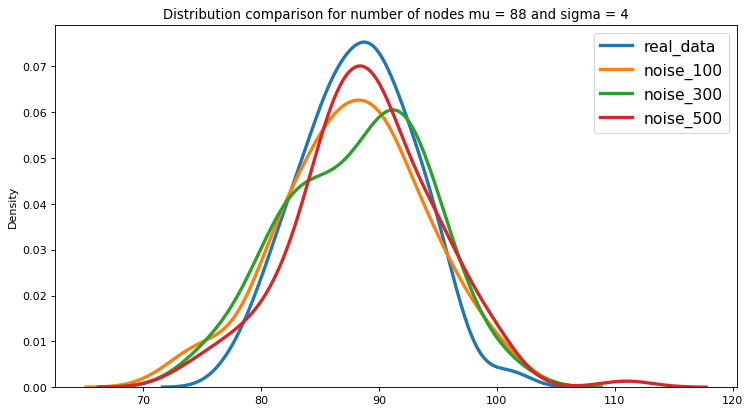

In [16]:
plt.figure(figsize=(11, 6), dpi=80)

sns.distplot(real_node_list, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label='real_data')
sns.distplot(simu_1, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label='noise_100')
sns.distplot(simu_2, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label='noise_300')
sns.distplot(simu_3, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label='noise_500')
# sns.distplot(node_list_4, hist = False, kde = True,
#                  kde_kws = {'linewidth': 3},label='noise_700')
plt.legend(prop={'size': 14})
plt.title('Distribution comparison for number of nodes mu = 88 and sigma = 4')

/home/rohit/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of number of node to suppress')

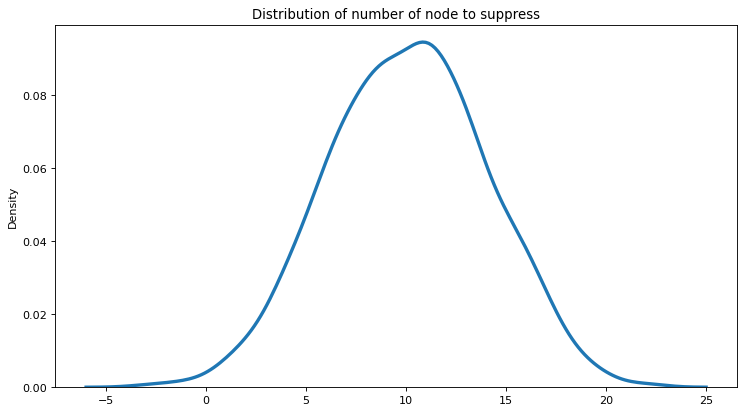

In [15]:
rand_list = []

for i in range(1000):
    rand_int = np.random.normal(0,1,1)
    rand_list.append(np.round(rand_int*sig_A_B+mu_A))
    
    
plt.figure(figsize=(11, 6), dpi=80)

sns.distplot(rand_list, hist = False, kde = True, kde_kws = {'linewidth': 3},label='dist_')
plt.title('Distribution of number of node to suppress')

/home/rohit/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Beta binomial Distribution of number of node to suppress')

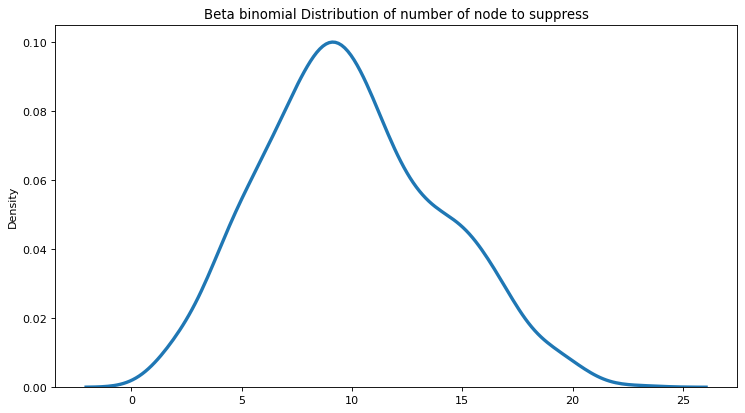

In [23]:
n = 30

mu = 10
sigma = 4

alpha = compute_alpha(n , mu, sigma**2)
beta = compute_beta(alpha, n, mu)
    
x = betabinom.rvs(n, alpha, beta, size=1000)

plt.figure(figsize=(11, 6), dpi=80)
sns.distplot(x, hist = False, kde = True, kde_kws = {'linewidth': 3},label='dist_')
plt.title('Beta binomial Distribution of number of node to suppress')

In [29]:
np.std(x)

4.052280345681922